# Data Science 180



![Alt text](http://thegeektown.com/wp-content/uploads/2015/03/data-scientist.jpg)




An adventure through 15 dimensions of data wrangling, visualization and modeling at mind-bending speeds.


## In a world with too much data sitting around and not enough insight, to whom will we turn for help?

![Alt](http://nextviewventures.com/blog/wp-content/uploads/2014/07/control-content-marekting-for-startups.jpg)

##YOU!    (Neo was busy...)


### You must learn how to wrangle data in the next few hours in order to save the education system. If you fail, we're all doomed...

### You have been given a dataset of test results and metadata, along with a laptop computer. 









#Good luck, everything depends on you.

 

###Where do we begin? 


###You know Python right? It does data stuff, right? OK, let's get started then.

###First thing to figure out is how to get the data files on your machine into Python in the first place.


###You've heard of this library called Pandas from another Agent -- it once saved them in a pinch. Lacking any better ideas, let's open up an editor and see if we can't at least cross the starting line.

#Reading data from disk

In [11]:
import pandas as pd
exam_data = pd.read_csv('data/PISA2009_Scored_Tests_MEX.csv')
bio_data = pd.read_csv('data/PISA2009_Questionnaire_MEX.csv')

###What did that just do? 



We called "read_csv", which presumably reads CSV files... and does what with them? 

##pd.read_csv does a magical thing 


It reads a CSV file into a DataFrame. 

DataFrames are mystical creatures in Data Science. 

Popularized by R, they provide a standardized MATRIX-style format for interacting with your data. Most data can fit into this row and column format: financial transactions, iPhone app user records, medical histories, etc.

(And you thought the Matrix references were just for fun)

![Alt](http://www.bigdataexaminer.com/wp-content/uploads/2014/12/screen-1.png)

##Since you were wondering

##Pandas has support for many formats

CSV, Text (tab separated, pipe separated, etc.), Excel, JSON, HTML, SQL, Stuff copied to your clipboard, HDF5...

## Slow down. What's really going on in the DataFrame?

## Two data structures: Series and DataFrame

###Series
Think of this as one column of your data - one data type.

### DataFrame
All of the columns in your data. Mixed data types. 



#Many Series can be combined and represented as a DataFrame object.

#A DataFrame can be represented as many Series objects. 




#Pandas provides tons of functions to:

###slice, dice, merge, join, group by, select, append, find, transform, sort, reverse, pivot and anything else you want to do




####... for both Series and DataFrames. 

Most functions are designed to work with either type or even combinations of the two, just like you would intuitively expect:

i.e. A concat function can contatenate arbitrary combinations of 0 to n Series and DataFrames.

#So you know a bit about DataFrames?

In [20]:
import pandas as pd
exam_data = pd.read_csv('data/PISA2009_Scored_Tests_MEX.csv')
bio_data = pd.read_csv('data/PISA2009_Questionnaire_MEX.csv')

#Fine. What's next?

#Exploratory Data Analysis. 

What the hell is in those files anyway?

Does it look like test data should? 

Is it completely empty? Full? Lots of missing values and NaN?

What are in the rows? columns?

Does it have appropriate features? (characteristics common to records belonging to a dataset)

###It's impossible to make good decisions moving forward until we know more

We can just output the entire dataframe to the console, but that doesn't scale beyond a couple hundred rows.

#Pandas gives us a number of tools: 


    
    .head(n)
    .info()
    .describe()

In [ ]:
exam_data.head(5)

In [ ]:
exam_data.info()

In [ ]:
exam_data.describe()

#We have two files, and both of them have a feature named 'Student ID 5-digit'


#Using this unique ID as our guide, we can match the exam scores and biographical data for a single student.

#This task comes up a lot in data wrangling, since different kinds of data will be stored in different databases. Often one of the first steps is to combine the relevant parts of each part of the data.

In [14]:
useless = {
    u' Version of cognitive database and date of release',
    u'3-character country code ',
    u'Adjudicated sub-region',
}

not_questions = {u'Booklet', 
                 u'School ID 5-digit', 
                 u'Student ID 5-digit',
                 u'OECD country',
                 u'Country code ISO 3-digit',}

score_mapping = {
    'Score 0': 0,
    'Score 1': 1,
    'Score 2': 2,
    'Not reached': 0,
}

questions = set(exam_data.columns) - not_questions - useless

for question in questions:
    exam_data[question] = exam_data[question].map(score_mapping)

In [15]:
math_qs = {q for q in questions if q.startswith('MATH')}
read_qs = {q for q in questions if q.startswith('READ')}
scie_qs = {q for q in questions if q.startswith('SCIE')}
    
totals = exam_data[list(questions)].sum(axis=1)
math_score = exam_data[list(math_qs)].sum(axis=1)
read_score = exam_data[list(read_qs)].sum(axis=1)
scie_score = exam_data[list(scie_qs)].sum(axis=1)

#Let's do a merge to get our data into a single managable file

In [16]:
score_df = pd.DataFrame({'Total Score': totals, 
                         'Math Score': math_score, 
                         'Reading Score': read_score, 
                         'Science Score': scie_score,
                         'Student ID 5-digit': exam_data['Student ID 5-digit']})

In [17]:
data = pd.merge(score_df, bio_data, on='Student ID 5-digit')


#Now we can pick any feature (read: column) and get information on it:

In [18]:
data['Reading Enjoyment Time'].value_counts()

30 minutes or less a day      16997
I don�t read for enjoyment     9071
Between 30 and 60 minutes      7047
1 to 2 hours a day             3772
More than 2 hours a day        1008
dtype: int64

#But what about relationships between variables?

We could look at sets of rows and see what occurs together, or compute statistics of co-occurrence ---> but still impossible to get a comprehensive view quickly.

What can we try?

#Let's do some plots!

#Matplotlib

- The historical go-to for plotting
- allows lots of fine-grained control
- built with numpy in mind

#Seaborn

- Expressive power
- built with pandas in mind

We will mainly use seaborn examples in this presentation

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


###Jupyter notebooks can display graphics inline

#Matplotlib

- The historical go-to for plotting
- allows lots of fine-grained control
- built with numpy in mind

#Seaborn

- Expressive power
- built with pandas in mind

We will mainly use seaborn examples in this presentation

In [ ]:
import seaborn as sns

#Scatterplot

View relationship between two continuous variables

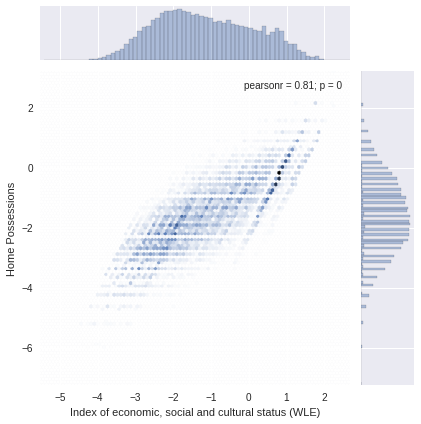

In [ ]:
sns.jointplot(data['Index of economic, social and cultural status (WLE)'], 
              data['Home Possessions'], kind="hex")

In this dataset, several variables can stand as proxies for socio-economic status

# Histogram


- Visualize distribution of continuous data.


- Visualize distribution across categorical levels.

- Can plot two histograms on top of each other

- See the effects of the variable on the target

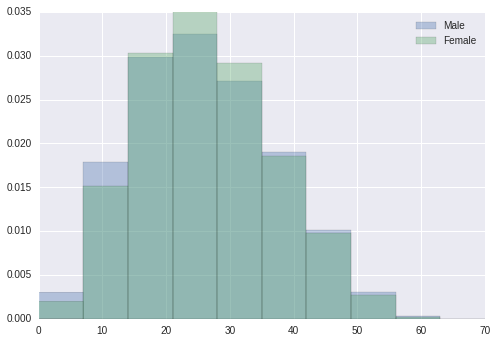

In [ ]:
groups = data.groupby('Sex').groups
for key, row_ids in groups.iteritems():
    pylab.hist(data['Total Score'][row_ids].values,
               normed=True,
               bins=np.linspace(0, 70, 11),
               alpha=0.35,
               label=str(key))
pylab.legend()

###Doesn't work as well for more than two levels

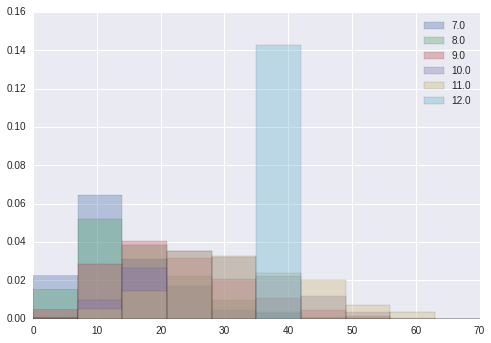

In [ ]:
groups = data.groupby('Grade').groups
for key, row_ids in groups.iteritems():
    pylab.hist(data['Total Score'][row_ids].values,
               normed=True,
               bins=np.linspace(0, 70, 11),
               alpha=0.35,
               label=str(key))
pylab.legend()

## Violin Plots work better for comparing several distributions

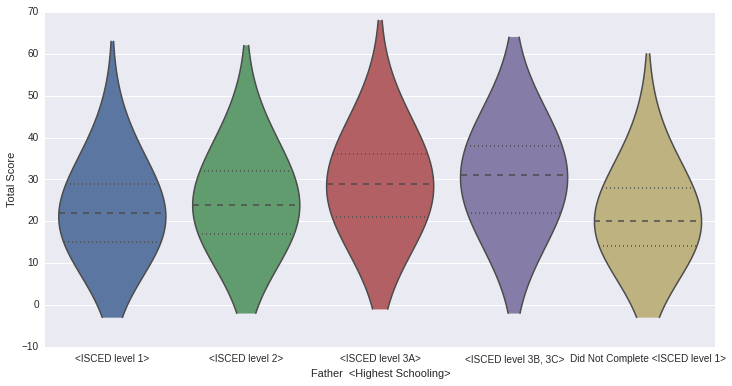

In [ ]:
nonnull_subset = data['Total Score'].notnull()
plt.figure(figsize=(12, 6))
sns.violinplot(data['Total Score'][nonnull_subset], 
               data['Father  <Highest Schooling>'][nonnull_subset], 
               inner='box',
               bw=1)

##Alternatively, use `FacetGrid`
###Visualize more effect of two variables

/home/brian/.virtualenvs/odsc/local/lib/python2.7/site-packages/numpy/lib/arraysetops.py:198: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


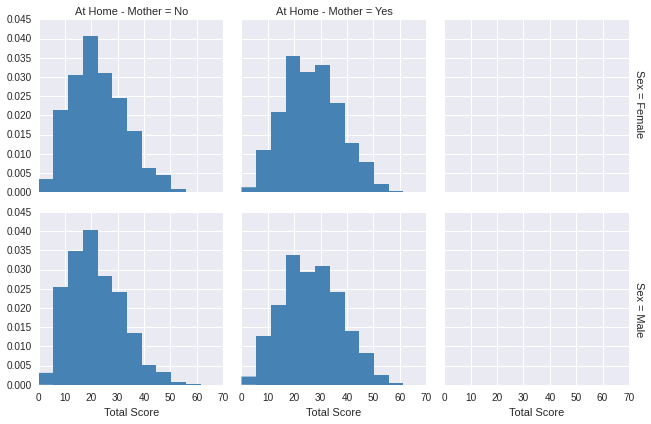

In [ ]:
g = sns.FacetGrid(data, row="Sex", col="At Home - Mother", margin_titles=True)
bins = np.linspace(0, 67, 13)
g.map(plt.hist, "Total Score", color="steelblue", bins=bins, lw=0, normed=True)

###If distribution not required, try factor plot

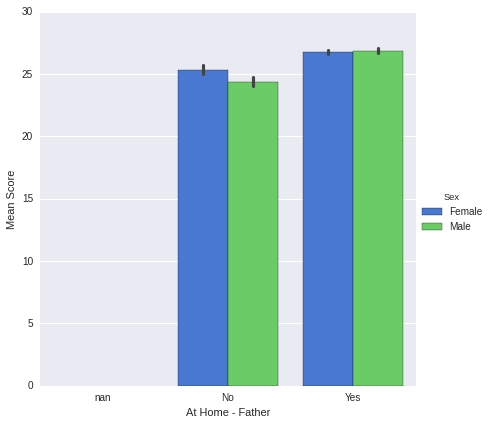

In [ ]:
g = sns.factorplot("At Home - Father", "Total Score", "Sex",
                    data=data, kind="bar",
                    size=6, palette="muted", dropna=True)
g.despine(left=True)
g.set_ylabels("Mean Score")

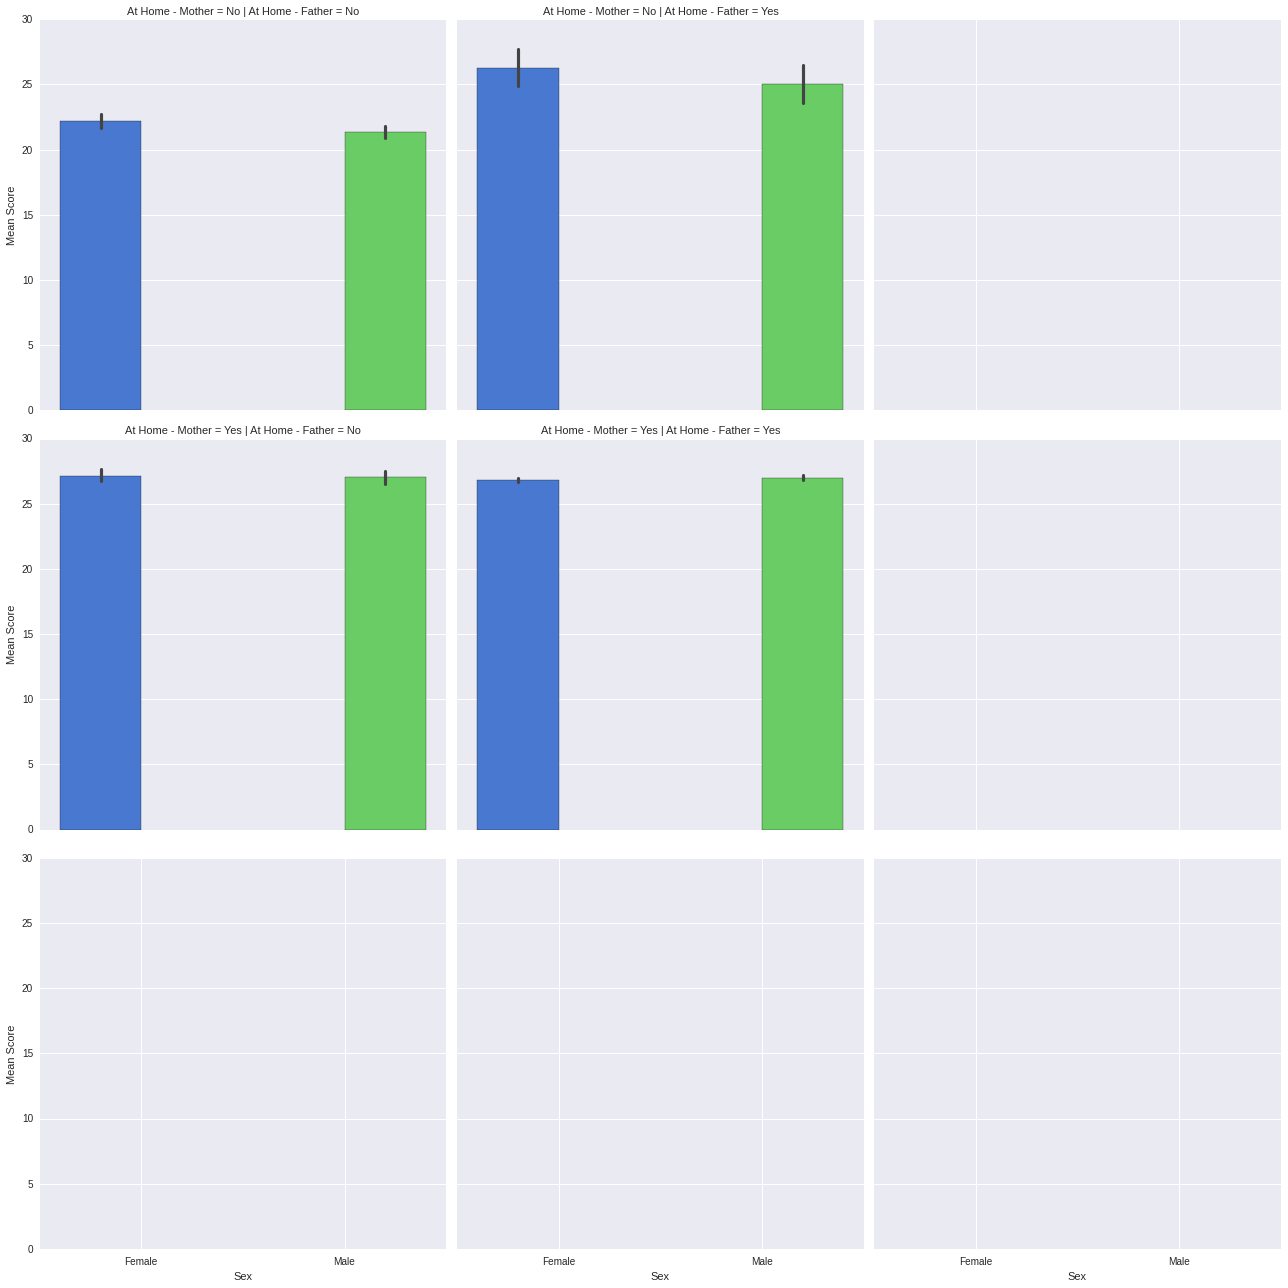

In [ ]:
g = sns.factorplot("Sex", "Total Score", "Sex",
                   row="At Home - Mother",
                   col="At Home - Father",
                   data=data, kind="bar",
                   size=6, palette="muted",
                   dropna=True)
g.despine(left=True)
g.set_ylabels("Mean Score")

#Heatmaps

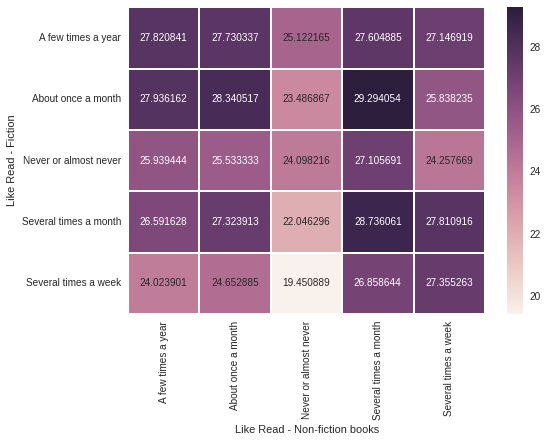

In [ ]:
ptable = pd.pivot_table(
    data, 
    values='Total Score', 
    index='Like Read - Fiction', 
    columns='Like Read - Non-fiction books')
sns.heatmap(ptable, annot=True, fmt="f")


###Not very useful if not in order...

###Heatmaps - Round 2
####Effects of variables over a range

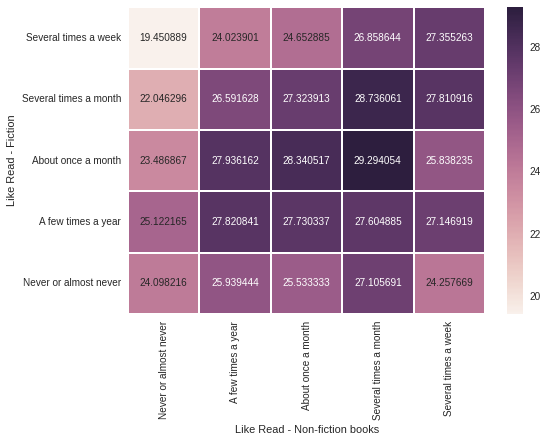

In [ ]:
display_order = [
    u'Never or almost never',
    u'A few times a year', 
    u'About once a month',                   
    u'Several times a month', 
    u'Several times a week'
]
display_table = ptable[display_order].reindex(reversed(display_order))
sns.heatmap(display_table,
            annot=True, 
            fmt="f")

###Pivot tables can do other aggregations

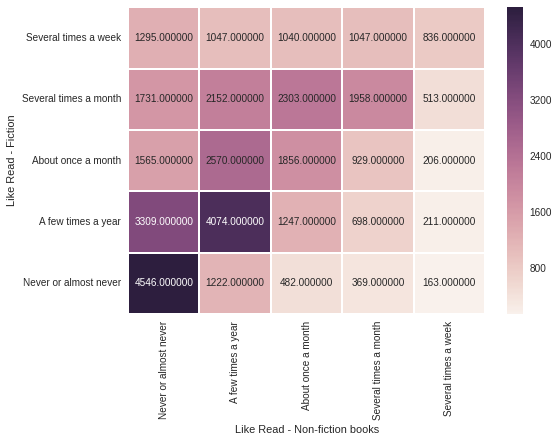

In [ ]:
count_table = pd.pivot_table(
    data, 
    values='Total Score', 
    index='Like Read - Fiction', 
    columns='Like Read - Non-fiction books',
    aggfunc=np.count_nonzero)

sns.heatmap(count_table[display_order].reindex(reversed(display_order)), annot=True, fmt="f")

#Scatterplot

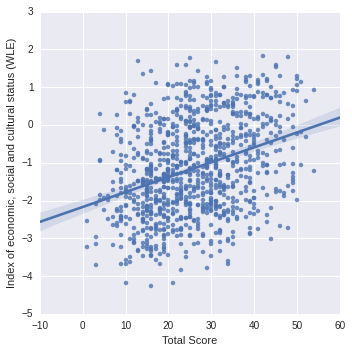

In [ ]:
import random
some_sample = random.sample(data.index, 1000)
sns.lmplot("Total Score", 
           'Index of economic, social and cultural status (WLE)', 
           data.ix[some_sample])

Why plot just a subset of the data?

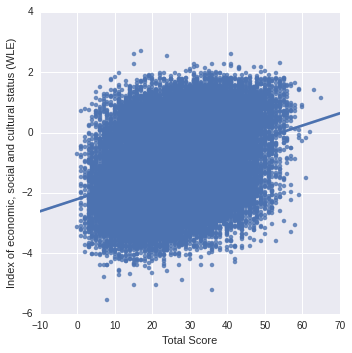

In [ ]:
sns.lmplot("Total Score", 
           'Index of economic, social and cultural status (WLE)', 
           data)

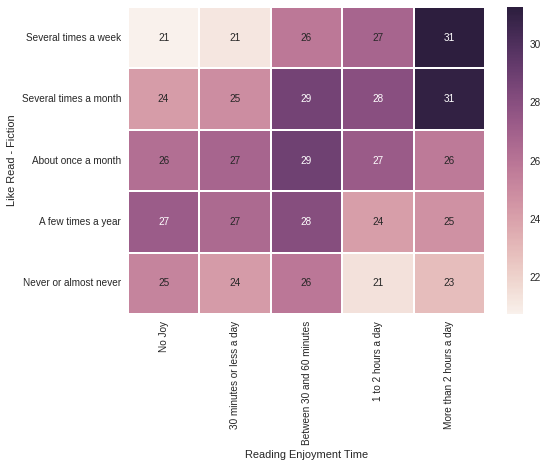

In [ ]:
bad_data = data['Reading Enjoyment Time'].apply(lambda x: isinstance(x, basestring) and x.startswith('I don'))
reading_enjoyment = data['Reading Enjoyment Time'].copy()
reading_enjoyment[bad_data] = 'No Joy'

time_x_fiction = pd.pivot_table(
    data, 
    values='Total Score', 
    index='Like Read - Fiction', 
    columns=reading_enjoyment)

col_order = [
    'No Joy', 
    '30 minutes or less a day', 
    'Between 30 and 60 minutes',
    '1 to 2 hours a day',
    'More than 2 hours a day'
]

row_order = [
    'Several times a week',
    'Several times a month',
    'About once a month',
    'A few times a year',
    'Never or almost never',
]

display_table = time_x_fiction[col_order].reindex(row_order)
sns.heatmap(display_table, annot=True)


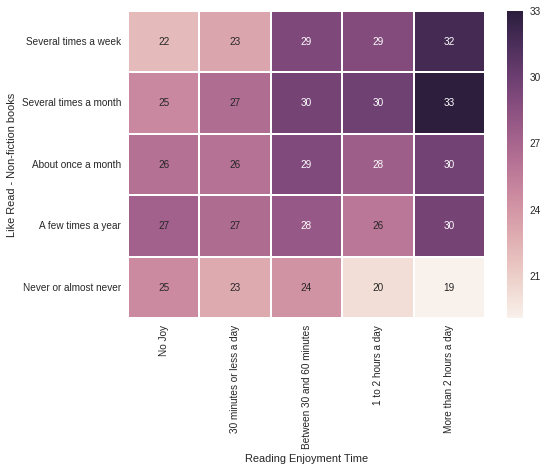

In [ ]:
bad_data = data['Reading Enjoyment Time'].apply(lambda x: isinstance(x, basestring) and x.startswith('I don'))
reading_enjoyment = data['Reading Enjoyment Time'].copy()
reading_enjoyment[bad_data] = 'No Joy'

time_x_nonfiction = pd.pivot_table(
    data, 
    values='Total Score', 
    index='Like Read - Non-fiction books', 
    columns=reading_enjoyment)

col_order = [
    'No Joy', 
    '30 minutes or less a day', 
    'Between 30 and 60 minutes',
    '1 to 2 hours a day',
    'More than 2 hours a day'
]

row_order = [
    'Several times a week',
    'Several times a month',
    'About once a month',
    'A few times a year',
    'Never or almost never',
]

non_f_display_table = time_x_nonfiction[col_order].reindex(row_order)
sns.heatmap(non_f_display_table, annot=True)

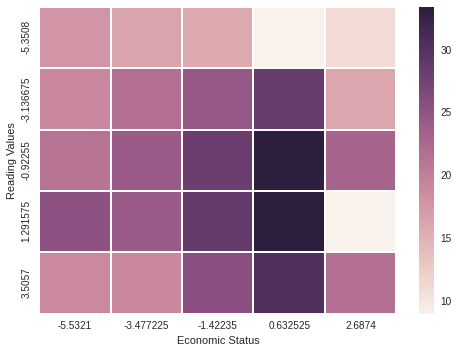

In [ ]:
key_reading = 'Online Reading'
key_score = 'Total Score'
key_econ = 'Index of economic, social and cultural status (WLE)'

data_reading = data[key_reading]
data_score = data[key_score]
data_econ = data[key_econ]

reading_bins = np.linspace(np.min(data_reading), np.max(data_reading), 5)
econ_bins = np.linspace(np.min(data_econ), np.max(data_econ), 5)

to_pivot = pd.DataFrame({
    key_reading: np.digitize(data_reading, 
                             bins=reading_bins),
    key_econ: np.digitize(data_econ,
                          bins=econ_bins),
    key_score: data_score
})

ptable = pd.pivot_table(
    to_pivot, 
    values=key_score,
    index=key_reading,
    columns=key_econ,
    aggfunc=np.mean)
ptable.columns = pd.Series(map(str, econ_bins), name='Economic Status')
ptable.index = pd.Series(map(str, reading_bins), name='Reading Values')

sns.heatmap(ptable, annot=False, fmt="f")

#Modeling

## Scikit-Learn

# Widely used machine learning package

- Classification Models
- Regression Models
- Clustering techniques
- Dimensionality Reduction
- Preprocessing
- ...

```
$ pip install scikit-learn
```

In [14]:
import sklearn

##Experimental Design

##Build a model that is useful

Can only build model on data that has a known output

Our data has missing values in the target

Today, we'll drop it


In [19]:
model_data = data[data['Total Score'].notnull()]
target = model_data.pop('Total Score')

## Avoiding overfitting
- Need to keep data we train on from data we validate on
- Otherwise the results will be overly optmistic
- ... and ultimately, the model will perform poorly on new data

In [20]:
import sklearn.cross_validation

(train_data, 
 test_data, 
 train_target, 
 test_target) = sklearn.cross_validation.train_test_split(
    model_data, target, test_size=0.2, random_state=1337
)

####Today we will use simple train/test split

####Recommend using multiple cross-validation folds

##Variable Preprocessing

###Most statistical models require numeric encoding

###Many will choke on missing values

###Need some massaging before fitting a statistical learner

In [22]:
import sklearn.preprocessing
import sklearn.feature_extraction

In [6]:
data['Repeat <ISCED 1>'].value_counts()

No, never             32753
Yes, once              3552
Yes, twice or more      442
dtype: int64

In [9]:
data['Mother  <Highest Schooling>'].value_counts()

<ISCED level 2>                     11400
<ISCED level 3A>                     8369
<ISCED level 1>                      7898
Did not complete <ISCED level 1>     4844
<ISCED level 3B, 3C>                 4631
dtype: int64

In [71]:
from sklearn.feature_extraction import DictVectorizer
encoder = DictVectorizer(sparse=False)

our_categ_vars = [
    'Repeat <ISCED 1>',
    'Mother  <Highest Schooling>',
    'Possessions Internet',
    'Online - Reading Emails',
    'Sex',
    'Reading Tasks - Memorise text',
]

vardata = train_data[our_categ_vars].fillna('MISSING')
encoder.fit(vardata.to_dict(orient='records'))

train_catdata = encoder.transform(vardata.to_dict(orient='records'))

test_vardata = test_data[our_categ_vars].fillna('MISSING')
test_catdata = encoder.transform(
    test_data[our_categ_vars].to_dict(orient='records'))

##Missing values in numeric columns

###We will impute with the median value


In [72]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

our_num_vars = [
    'Grade',
    'Home Possessions',
    'Joy/Like Reading',
    'Diversity reading',
    'No of ALL <class period> a week',
    'Reading for School: Traditional literature courses',
    'Min in <class period> for <Maths>'
]

numdata = train_data[our_num_vars]
imputer.fit(numdata)

train_numdata = imputer.transform(numdata)
test_numdata = imputer.transform(test_data[our_num_vars])

### Now, we put our training data back together again

In [73]:
train_this = np.hstack([train_numdata, train_catdata])
test_this = np.hstack([test_numdata, test_catdata])

##Finally, ready to build a model
###Linear Regression is a sensible first choice

In [108]:
import sklearn
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(train_this, train_target)

lr_predictions = pd.Series(lr.predict(test_this),
                           name='Linear Regression')

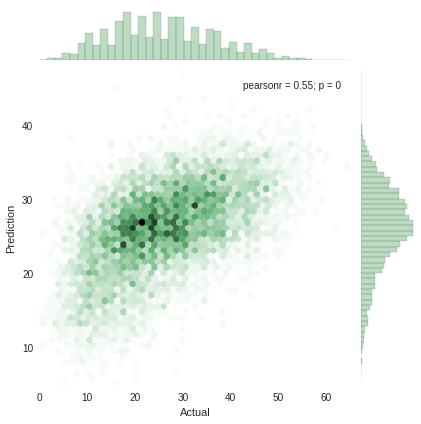

In [129]:
p_df = pd.DataFrame({'Prediction': lr_predictions,
                     'Actual': test_target.values})

pylab.figure(figsize=(10, 10))
sns.jointplot('Actual', 'Prediction', data=p_df, kind="hex", color=sns.color_palette()[1])

##Was our model any good?

In [76]:
from sklearn import metrics

test_metrics = {
    'Explained Variance': metrics.explained_variance_score,
    'MAE': metrics.mean_absolute_error,
    'MSE': metrics.mean_squared_error,
    'MedAE': metrics.median_absolute_error,
    'R2': metrics.r2_score
}

In [115]:
def metrics_report(*predictions):
    records = []
    for prediction_set in predictions:
        record = {'name': prediction_set.name}
        for metric_name in sorted(test_metrics.keys()):
            metric_func = test_metrics[metric_name]
            record[metric_name] = metric_func(test_target, prediction_set)
        records.append(record)
    frame = pd.DataFrame.from_records(records).set_index('name')
    return frame
        
metrics_report(lr_predictions)
    

,Explained Variance,MAE,MSE,MedAE,R2
name,,,,,
Linear Regression,0.301405,7.410792,83.480597,6.400983,0.300587


##These numbers don't really tell you if a model is good
###Not by themselves, at least
###Keep them in mind while we do more modeling

##Now, just for a baseline
###Let's look at the mean and median predictors

In [116]:
mean_response = np.mean(train_target)
mean_predictions = pd.Series(np.ones_like(test_target) * mean_response,
                             name='Mean Response')

median_response = np.median(train_target)
median_predictions = pd.Series(np.ones_like(test_target) * median_response,
                               name='Median Response')

metrics_report(mean_predictions, 
               median_predictions, 
               lr_predictions)

,Explained Variance,MAE,MSE,MedAE,R2
name,,,,,
Mean Response,0.000000,8.946967,119.362053,7.854600,-0.000034
Median Response,0.000000,8.922141,120.201125,8.000000,-0.007064
Linear Regression,0.301405,7.410792,83.480597,6.400983,0.300587


##Ordinary linear regression is boring
### Let's try something more exotic

In [78]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import ElasticNet

estimator = linear_model.ElasticNet()

parameters = {
    'alpha': np.linspace(0.1, 2, 10, endpoint=True),
    'l1_ratio': np.linspace(0, 1, 10, endpoint=True)
}

enet = GridSearchCV(estimator, parameters, verbose=2, n_jobs=4)
enet.fit(train_this, train_target)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] alpha=0.1, l1_ratio=0.0 .........................................
[CV] ................................ alpha=0.1, l1_ratio=0.0 -   3.6s
[CV] alpha=0.1, l1_ratio=0.0 .........................................
[CV] ................................ alpha=0.1, l1_ratio=0.0 -   3.5s
[CV] alpha=0.1, l1_ratio=0.0 .........................................
[CV] ................................ alpha=0.1, l1_ratio=0.0 -   3.6s
[CV] alpha=0.1, l1_ratio=0.111111111111 ..............................
[CV] ..................... alpha=0.1, l1_ratio=0.111111111111 -   0.1s
[CV] alpha=0.1, l1_ratio=0.111111111111 ..............................
[CV] ..................... alpha=0.1, l1_ratio=0.111111111111 -   0.1s
[CV] alpha=0.1, l1_ratio=0.111111111111 ..............................
[CV] ..................... alpha=0.1, l1_ratio=0.111111111111 -   0.1s
[CV] alpha=0.1, l1_ratio=0.222222222222 ..............................
[CV] .........

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    3.6s
[Parallel(n_jobs=1)]: Done  41 jobs       | elapsed:   24.3s



[CV] alpha=0.311111111111, l1_ratio=0.333333333333 ...................
[CV] .......... alpha=0.311111111111, l1_ratio=0.333333333333 -   0.1s
[CV] alpha=0.311111111111, l1_ratio=0.444444444444 ...................
[CV] .......... alpha=0.311111111111, l1_ratio=0.444444444444 -   0.1s
[CV] alpha=0.311111111111, l1_ratio=0.444444444444 ...................
[CV] .......... alpha=0.311111111111, l1_ratio=0.444444444444 -   0.1s
[CV] alpha=0.311111111111, l1_ratio=0.444444444444 ...................
[CV] .......... alpha=0.311111111111, l1_ratio=0.444444444444 -   0.1s
[CV] alpha=0.311111111111, l1_ratio=0.555555555556 ...................
[CV] .......... alpha=0.311111111111, l1_ratio=0.555555555556 -   0.1s
[CV] alpha=0.311111111111, l1_ratio=0.555555555556 ...................
[CV] .......... alpha=0.311111111111, l1_ratio=0.555555555556 -   0.1s
[CV] alpha=0.311111111111, l1_ratio=0.555555555556 ...................
[CV] .......... alpha=0.311111111111, l1_ratio=0.555555555556 -   0.1s
[CV] 

[Parallel(n_jobs=1)]: Done 162 jobs       | elapsed:  1.2min
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  2.1min finished


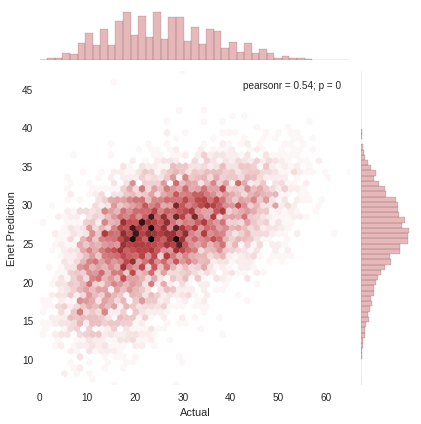

In [131]:
enet_predictions = pd.Series(enet.predict(test_this),
                             name='Elastic Net')
p_df = pd.DataFrame({'Enet Prediction': enet_predictions,
                     'Actual': test_target.values})

pylab.figure(figsize=(10, 10))
sns.jointplot('Actual', 'Enet Prediction', data=p_df, kind="hex",
              color=sns.color_palette()[2])

In [119]:
metrics_report(mean_predictions, median_predictions, lr_predictions, enet_predictions)

,Explained Variance,MAE,MSE,MedAE,R2
name,,,,,
Mean Response,0.000000,8.946967,119.362053,7.854600,-0.000034
Median Response,0.000000,8.922141,120.201125,8.000000,-0.007064
Linear Regression,0.301405,7.410792,83.480597,6.400983,0.300587
Elastic Net,0.289682,7.483740,84.801702,6.518074,0.289518


##Let's do a RandomForest too. 

##Because why not?


In [81]:
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()

parameters = {'n_estimators': (5, 10, 15, 20),
              'min_samples_split': (4, 8, 16),
              'min_samples_leaf': (1, 2, 4),
             }
rfr = GridSearchCV(estimator, parameters, verbose=2, n_jobs=4)
rfr.fit(train_this, train_target)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=4)]: Done   1 jobs       | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done  41 jobs       | elapsed:   37.3s
[Parallel(n_jobs=4)]: Done 108 out of 108 | elapsed:  1.6min finished


[CV] min_samples_split=4, n_estimators=5, min_samples_leaf=1 .........
[CV] min_samples_split=4, n_estimators=5, min_samples_leaf=1 .........
[CV] min_samples_split=4, n_estimators=5, min_samples_leaf=1 .........
[CV] min_samples_split=4, n_estimators=10, min_samples_leaf=1 ........
[CV]  min_samples_split=4, n_estimators=5, min_samples_leaf=1 -   1.6s[CV]  min_samples_split=4, n_estimators=5, min_samples_leaf=1 -   1.4s[CV]  min_samples_split=4, n_estimators=5, min_samples_leaf=1 -   1.8s[CV]  min_samples_split=4, n_estimators=10, min_samples_leaf=1 -   2.8s



[CV] min_samples_split=4, n_estimators=10, min_samples_leaf=1 ........
[CV] min_samples_split=4, n_estimators=10, min_samples_leaf=1 ........
[CV] min_samples_split=4, n_estimators=15, min_samples_leaf=1 ........[CV] min_samples_split=4, n_estimators=15, min_samples_leaf=1 ........[CV]  min_samples_split=4, n_estimators=10, min_samples_leaf=1 -   3.0s[CV]  min_samples_split=4, n_estimators=10, min_samples_leaf=1 -   3.2s



[CV

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=4,
       param_grid={'n_estimators': (5, 10, 15, 20), 'min_samples_split': (4, 8, 16), 'min_samples_leaf': (1, 2, 4)},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=2)

[CV] min_samples_split=16, n_estimators=10, min_samples_leaf=2 .......
[CV] min_samples_split=8, n_estimators=10, min_samples_leaf=4 ........
[CV] min_samples_split=16, n_estimators=10, min_samples_leaf=4 .......

[CV]  min_samples_split=16, n_estimators=10, min_samples_leaf=2 -   2.3s[CV]  min_samples_split=8, n_estimators=10, min_samples_leaf=4 -   2.7s[CV]  min_samples_split=16, n_estimators=10, min_samples_leaf=4 -   2.2s[CV] min_samples_split=4, n_estimators=20, min_samples_leaf=4 ........



[CV] min_samples_split=16, n_estimators=15, min_samples_leaf=2 .......
[CV] min_samples_split=8, n_estimators=15, min_samples_leaf=4 ........
[CV] min_samples_split=16, n_estimators=15, min_samples_leaf=4 .......
[CV]  min_samples_split=4, n_estimators=20, min_samples_leaf=4 -   5.2s[CV]  min_samples_split=16, n_estimators=15, min_samples_leaf=2 -   3.6s[CV]  min_samples_split=8, n_estimators=15, min_samples_leaf=4 -   3.5s[CV]  min_samples_split=16, n_estimators=15, min_samples_leaf=4 -   3.

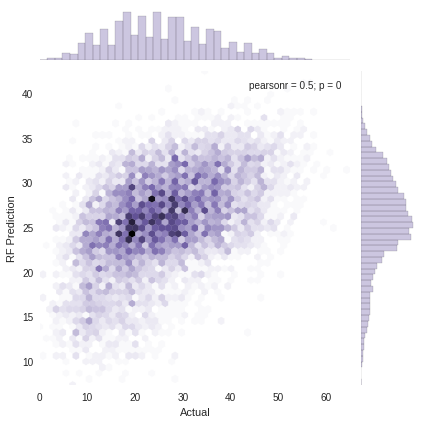

In [132]:
rfr_predictions = pd.Series(rfr.predict(test_this),
                            name='Random Forest')

p_df = pd.DataFrame({'RF Prediction': test_predictions,
                     'Actual': test_target.values})

pylab.figure(figsize=(10, 10))
sns.jointplot('Actual', 'RF Prediction', data=p_df, kind="hex",
              color=sns.color_palette()[3])

In [121]:
metrics_report(mean_predictions,
               median_predictions,
               lr_predictions,
               enet_predictions,
               rfr_predictions)

,Explained Variance,MAE,MSE,MedAE,R2
name,,,,,
Mean Response,0.000000,8.946967,119.362053,7.854600,-0.000034
Median Response,0.000000,8.922141,120.201125,8.000000,-0.007064
Linear Regression,0.301405,7.410792,83.480597,6.400983,0.300587
Elastic Net,0.289682,7.483740,84.801702,6.518074,0.289518
Random Forest,0.290161,7.423246,84.750929,6.422767,0.289943


##These models seem very close
###Are they doing anything differently?

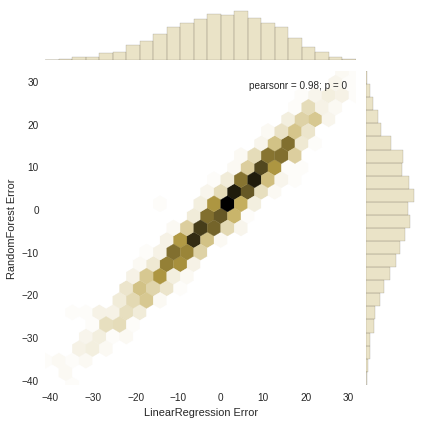

In [134]:
lr_diffs = lr_predictions - test_target
lr_diffs.name = 'LinearRegression Error'
rfr_diffs = rfr_predictions - test_target
rfr_diffs.name = 'RandomForest Error'

sns.jointplot(lr_diffs, rfr_diffs, kind='hex', color=sns.color_palette()[4])

###They are making the same kinds of errors

###Not unexpected

#Feature Engineering (lite)

## Simple transformations
### Quadratic combinations of existing features

In [136]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2

model = make_pipeline(PolynomialFeatures(degree), Lasso())
model.fit(train_this, train_target)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

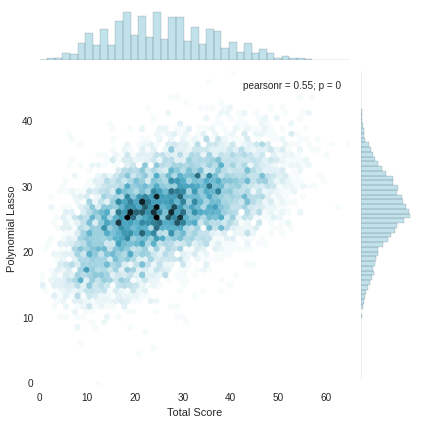

In [137]:
poly_preds = pd.Series(model.predict(test_this),
                       name='Polynomial Lasso',
                       index=test_target.index)


sns.jointplot(test_target, 
              poly_preds,
              kind='hex',
              color=sns.color_palette()[5])    

In [122]:
metrics_report(mean_predictions,
               median_predictions,
               lr_predictions,
               enet_predictions,
               rfr_predictions,
               poly_preds)

,Explained Variance,MAE,MSE,MedAE,R2
name,,,,,
Mean Response,0.000000,8.946967,119.362053,7.854600,-0.000034
Median Response,0.000000,8.922141,120.201125,8.000000,-0.007064
Linear Regression,0.301405,7.410792,83.480597,6.400983,0.300587
Elastic Net,0.289682,7.483740,84.801702,6.518074,0.289518
Random Forest,0.290161,7.423246,84.750929,6.422767,0.289943
Polynomial Lasso Predictions,0.303468,7.401725,83.197697,6.474314,0.302957


#What next?

##Try more variables
##Try different transforms
##Ask lots of questions
###See where you end up!

#Wrap up

##Pandas is great for manipulating data
##Matplotlib and Seaborn make sweet visualizations
##Scikit-Learn has great ML tools

#Thanks for coming!
##Enjoy ODSC!



